In [1]:
import cv2
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from glob import glob
from albumentations import RandomCrop, HorizontalFlip, VerticalFlip

from sklearn.model_selection import train_test_split
from PIL import Image

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model
import os

import sys
sys.path.append('/home/012695917/ME297/Project/Drone-AI-Segmentation/Segmentation/src')
sys.path.append('/home/012695917/ME297/Project/Drone-AI-Segmentation/Segmentation/src/utils')

from data_IO import (create_dir, create_dataframe)
from data_preprocess import (read_image, read_mask, 
                                   tf_dataset, preprocess,
                                   augment_data)
from dimensions import Height, Width

In [2]:
model_predictions = "predictions_11"

predictions_path = "predicted_images/" + model_predictions

Augmented images:  1600 - Augmented masks: 1600
Total Images:  1600


100%|██████████| 160/160 [00:00<00:00, 323884.48it/s]


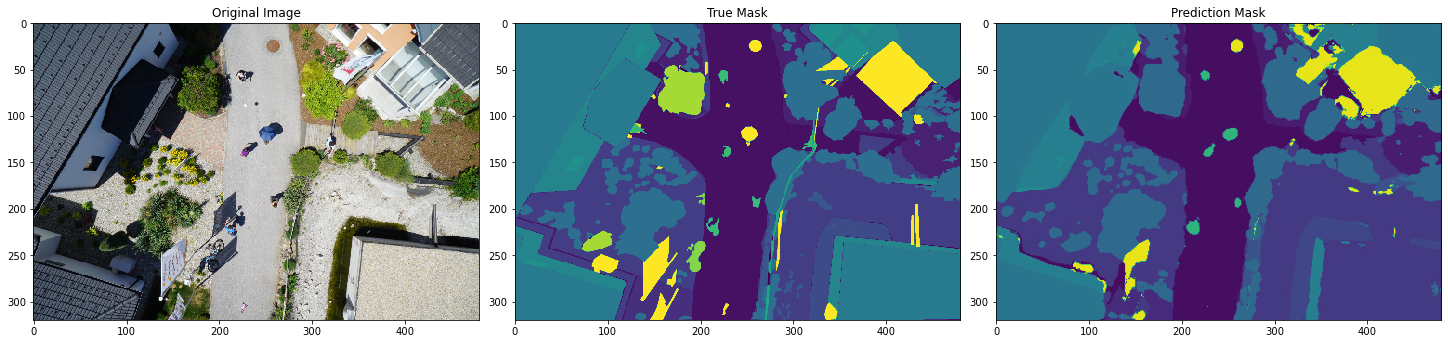

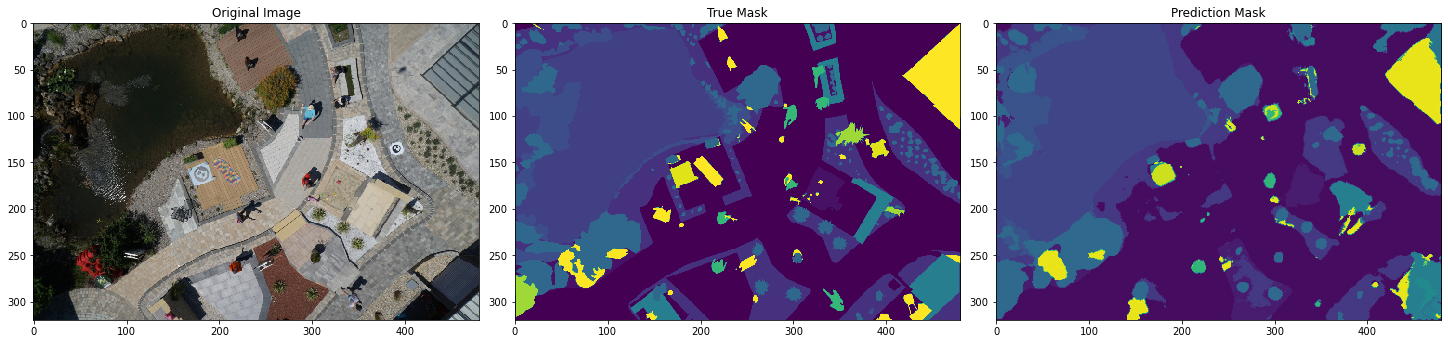

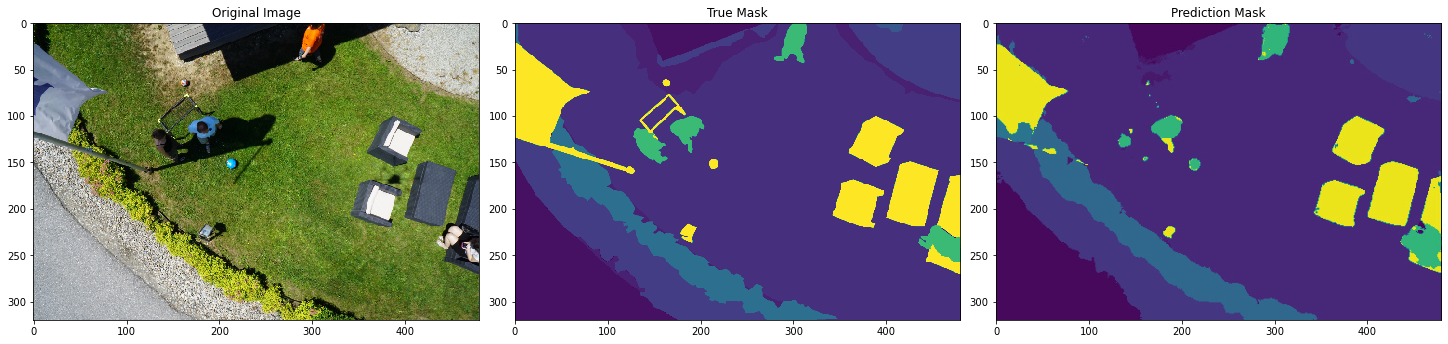

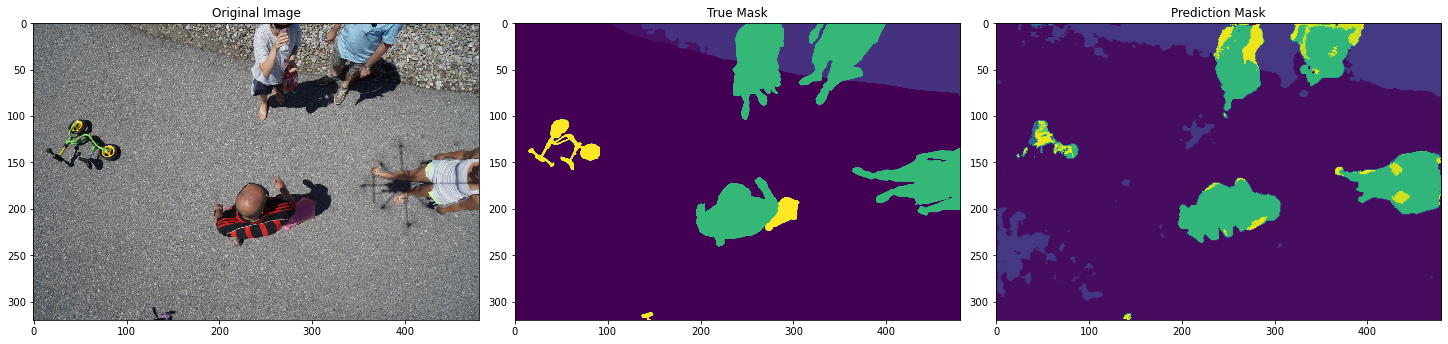

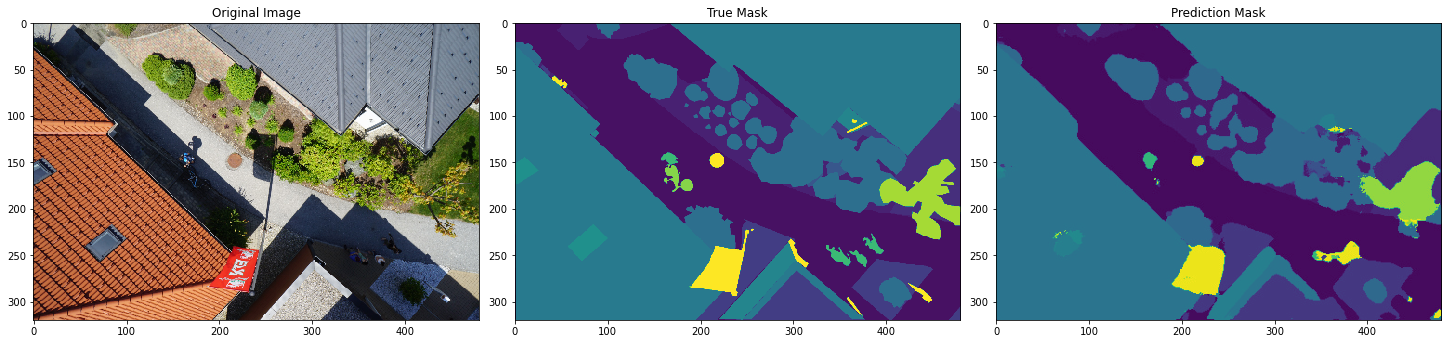

In [3]:
H = Height
W = Width

path = "../data/dataset/semantic_drone_dataset"
save_path = "../data/dataset/semantic_drone_dataset/new_data/"

images = sorted(glob(os.path.join(save_path, "images/*")))
masks = sorted(glob(os.path.join(save_path, "masks/*")))
print(f"Augmented images:  {len(images)} - Augmented masks: {len(masks)}")

# Create dataframe
image_path =  os.path.join(save_path, "images/")
label_path = os.path.join(save_path, "masks/")
df_images = create_dataframe(image_path)
df_masks = create_dataframe(label_path)
print('Total Images: ', len(df_images))
#print(df_images)

# Split data
X_trainval, X_test = train_test_split(df_images['id'], test_size=0.1, random_state=19)

#the same values for images (X) and labels (y)
y_test = X_test

img_test = [os.path.join(image_path, f"{name}.jpg") for name in X_test]
mask_test = [os.path.join(label_path, f"{name}.png") for name in y_test]

image_list = []
mask_list = []

for x,y in tqdm(zip(img_test, mask_test), total=len(img_test)):
    name = x.split("/")[-1]
    image_name = name[4]

    name = y.split("/")[-1]
    mask_name = name[4]
    
    if image_name == '0':
        image_list.append(x)
        mask_list.append(y)
        
## Plot 5 images to verify the accuracy in the predictions

img_selection = image_list[10:15]
mask_selection = mask_list[10:15]

for img, mask in zip(img_selection, mask_selection):
    name = img.split("/")[-1]
    x = cv2.imread(img, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = cv2.resize(x, (W, H))

    y = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    y = cv2.resize(y, (W, H))


    p = cv2.imread(f"../results/{predictions_path}/{name}", cv2.IMREAD_GRAYSCALE)
    p = cv2.resize(p, (W, H))

    fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

    axs[0].imshow(x, interpolation = 'nearest')
    axs[0].set_title('Original Image')
    axs[0].grid(False)

    axs[1].imshow(y, interpolation = 'nearest')
    axs[1].set_title('True Mask')
    axs[1].grid(False)

    axs[2].imshow(p)
    axs[2].set_title('Prediction Mask')
    axs[2].grid(False)